In [ ]:
#OK

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [3]:
@model st_r_pnt begin
    @parameter begin
        d_Rr_chair = 9381.9
        k_Rr_chair = 2000000
        z_k_Rr_chair_ini = 0.00041361
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "ST_R_PNT") 
end

st_r_pnt (generic function with 1 method)

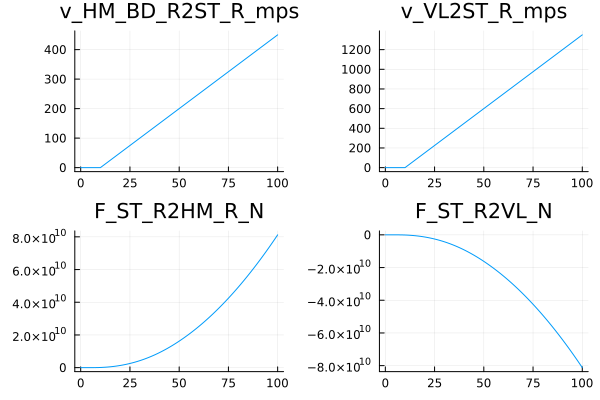

In [5]:
@model TestSt_r_pnt begin


    @block begin
        p = st_r_pnt()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.v_HM_BD_R2ST_R_mps
        ramp2.out => p.v_VL2ST_R_mps
    end
    @scope begin
        p.v_HM_BD_R2ST_R_mps => v_HM_BD_R2ST_R_mps
        p.v_VL2ST_R_mps => v_VL2ST_R_mps
        p.F_ST_R2HM_R_N => F_ST_R2HM_R_N 
        p.F_ST_R2VL_N => F_ST_R2VL_N
    end
end
m = @compile TestSt_r_pnt()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(2,2))